In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
path_covid9= 'archive/RAW_us_confirmed_cases.csv'
covid19_case_us = pd.read_csv(path_covid9, delimiter=',') 
covid19_case_us.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,10043,10047,10048,10061,10083,10219,10228,10239,10252,10258
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,37245,37258,37266,37285,37325,37350,37372,37398,37414,37425
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,3577,3578,3578,3583,3595,3596,3596,3599,3601,3601
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,4251,4252,4253,4256,4262,4275,4276,4278,4279,4281
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,10192,10197,10207,10227,10338,10364,10371,10395,10406,10408


In [25]:
covid19_case_us.drop(['Province_State','Admin2','UID','iso2','iso3','code3','FIPS','Country_Region','Lat', 'Long_']
                     , axis=1, inplace=True)
covid19_case_us

,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21
0,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,...,10043,10047,10048,10061,10083,10219,10228,10239,10252,10258
1,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,...,37245,37258,37266,37285,37325,37350,37372,37398,37414,37425
2,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,...,3577,3578,3578,3583,3595,3596,3596,3599,3601,3601
3,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,...,4251,4252,4253,4256,4262,4275,4276,4278,4279,4281
4,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,...,10192,10197,10207,10227,10338,10364,10371,10395,10406,10408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,"Teton, Wyoming, US",0,0,0,0,0,0,0,0,0,...,5119,5119,5152,5164,5168,5185,5204,5204,5204,5218
3338,"Uinta, Wyoming, US",0,0,0,0,0,0,0,0,0,...,3781,3781,3794,3805,3814,3817,3829,3829,3829,3843
3339,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3340,"Washakie, Wyoming, US",0,0,0,0,0,0,0,0,0,...,1677,1677,1690,1700,1715,1719,1731,1731,1731,1745


In [26]:
covid19_case_us.set_index(['Combined_Key'], inplace=True)

Text(0.5, 1.0, 'Infection Cases of COVID-19-Hartford,Connecticut')

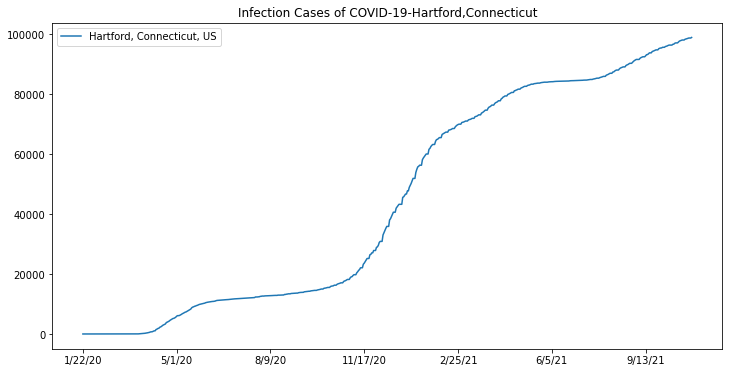

In [34]:
fig = plt.figure(figsize =(12,6))
fig = covid19_case_us.loc['Hartford, Connecticut, US'].plot()
plt.legend()
plt.title('Infection Cases of COVID-19-Hartford,Connecticut')

In [35]:
#Daily Cases
covid19_case_us.loc['Hartford, Connecticut, US'].diff()

1/22/20       NaN
1/23/20       0.0
1/24/20       0.0
1/25/20       0.0
1/26/20       0.0
            ...  
10/28/21    112.0
10/29/21    106.0
10/30/21      0.0
10/31/21      0.0
11/1/21     188.0
Name: Hartford, Connecticut, US, Length: 650, dtype: float64

Text(0.5, 1.0, 'Infection Daily Cases of COVID-19-Hartford,Connecticut')

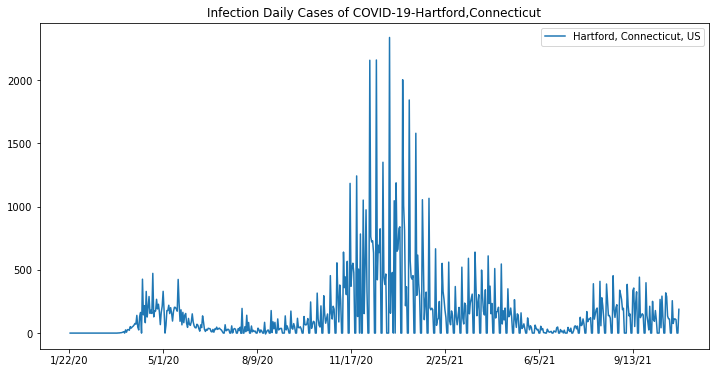

In [36]:
fig_daily = plt.figure(figsize =(12,6))
fig_daily = covid19_case_us.loc['Hartford, Connecticut, US'].diff().plot()
plt.legend()
plt.title('Infection Daily Cases of COVID-19-Hartford,Connecticut')

In [69]:
#Daily Case Rate Population of Hartford,Connecticut is 899,498
case_rate=covid19_case_us.loc['Hartford, Connecticut, US'].diff()/899498*100

In [72]:
case_rate=case_rate.fillna(0)
case_rate

1/22/20     0.000000
1/23/20     0.000000
1/24/20     0.000000
1/25/20     0.000000
1/26/20     0.000000
              ...   
10/28/21    0.012451
10/29/21    0.011784
10/30/21    0.000000
10/31/21    0.000000
11/1/21     0.020901
Name: Hartford, Connecticut, US, Length: 650, dtype: float64

In [74]:
#Convert case_rate(list) to Dataframe

Hartford_daily_case_rate = pd.DataFrame(case_rate)
Hartford_daily_case_rate
                                 

In [79]:
Hartford_daily_case_rate.rename(columns = {'Hartford, Connecticut, US':'Confirmed_Case_Daily'},inplace=True)
Hartford_daily_case_rate
 

,Confirmed_Case_Daily
1/22/20,0.000000
1/23/20,0.000000
1/24/20,0.000000
1/25/20,0.000000
1/26/20,0.000000
...,...
10/28/21,0.012451
10/29/21,0.011784
10/30/21,0.000000
10/31/21,0.000000


In [94]:
Hartford_daily_case_rate=Hartford_daily_case_rate.reset_index()


In [95]:
Hartford_daily_case_rate

,index,Confirmed_Case_Daily
0,1/22/20,0.000000
1,1/23/20,0.000000
2,1/24/20,0.000000
3,1/25/20,0.000000
4,1/26/20,0.000000
...,...,...
645,10/28/21,0.012451
646,10/29/21,0.011784
647,10/30/21,0.000000
648,10/31/21,0.000000


In [96]:
Hartford_daily_case_rate.rename(columns = {'index':'date'},inplace=True)
Hartford_daily_case_rate

,date,Confirmed_Case_Daily
0,1/22/20,0.000000
1,1/23/20,0.000000
2,1/24/20,0.000000
3,1/25/20,0.000000
4,1/26/20,0.000000
...,...,...
645,10/28/21,0.012451
646,10/29/21,0.011784
647,10/30/21,0.000000
648,10/31/21,0.000000


In [103]:
Hartford_daily_case_rate['date'] = pd.to_datetime(Hartford_daily_case_rate['date'],format='%m/%d/%y')
Hartford_daily_case_rate['date'].dtypes

dtype('<M8[ns]')

In [105]:
Hartford_daily_case_rate['date']= Hartford_daily_case_rate['date'].dt.strftime('%m/%d/%y')

In [106]:
Hartford_daily_case_rate

,date,Confirmed_Case_Daily
0,01/22/20,0.000000
1,01/23/20,0.000000
2,01/24/20,0.000000
3,01/25/20,0.000000
4,01/26/20,0.000000
...,...,...
645,10/28/21,0.012451
646,10/29/21,0.011784
647,10/30/21,0.000000
648,10/31/21,0.000000


In [109]:
Hartford_daily_case_rate.to_csv("./Hartford_daily_case_rate.csv")  

Text(0.5, 1.0, 'Infection Daily Case Rate of COVID-19-Hartford,Connecticut')

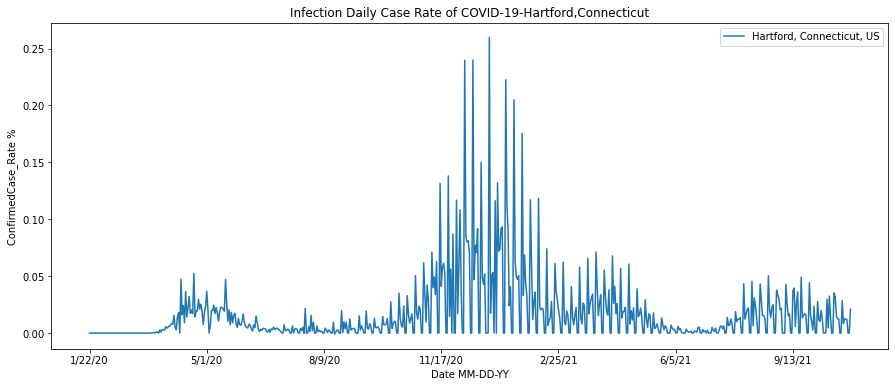

In [54]:
fig_daily_rate = plt.figure(figsize =(15,6))
fig_daily_rate = case_rate.plot()
plt.xlabel("Date MM-DD-YY")
plt.ylabel("ConfirmedCase_Rate %")
plt.legend()
plt.title('Infection Daily Case Rate of COVID-19-Hartford,Connecticut')

In [42]:
#Apply Mask Policy
path_mask= 'U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv'
mask_us = pd.read_csv(path_mask, delimiter=',') 
mask_us.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN


In [44]:
Hartford_mask = mask_us.loc[mask_us['County_Name'] == 'Hartford County']
Hartford_mask

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
82205,CT,Hartford County,9,3,4/10/2020,2,NaN,NaN,NaN,NaN
82206,CT,Hartford County,9,3,4/11/2020,2,NaN,NaN,NaN,NaN
82207,CT,Hartford County,9,3,4/12/2020,2,NaN,NaN,NaN,NaN
82208,CT,Hartford County,9,3,4/13/2020,2,NaN,NaN,NaN,NaN
82209,CT,Hartford County,9,3,4/14/2020,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
930343,CT,Hartford County,9,3,8/11/2021,1,Yes,Official,https://portal.ct.gov/-/media/Office-of-the-Go...,"Conn. Exec. Order No. 13A (Aug. 5, 2021)"
930344,CT,Hartford County,9,3,8/12/2021,1,Yes,Official,https://portal.ct.gov/-/media/Office-of-the-Go...,"Conn. Exec. Order No. 13A (Aug. 5, 2021)"
930345,CT,Hartford County,9,3,8/13/2021,1,Yes,Official,https://portal.ct.gov/-/media/Office-of-the-Go...,"Conn. Exec. Order No. 13A (Aug. 5, 2021)"
930346,CT,Hartford County,9,3,8/14/2021,1,Yes,Official,https://portal.ct.gov/-/media/Office-of-the-Go...,"Conn. Exec. Order No. 13A (Aug. 5, 2021)"


In [45]:
Hartford_mask.drop(['State_Tribe_Territory','FIPS_State','FIPS_County','URL','Citation'], axis=1, inplace=True)
Hartford_mask

/Users/xiaoyulin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,County_Name,date,order_code,Face_Masks_Required_in_Public,Source_of_Action
82205,Hartford County,4/10/2020,2,NaN,NaN
82206,Hartford County,4/11/2020,2,NaN,NaN
82207,Hartford County,4/12/2020,2,NaN,NaN
82208,Hartford County,4/13/2020,2,NaN,NaN
82209,Hartford County,4/14/2020,2,NaN,NaN
...,...,...,...,...,...
930343,Hartford County,8/11/2021,1,Yes,Official
930344,Hartford County,8/12/2021,1,Yes,Official
930345,Hartford County,8/13/2021,1,Yes,Official
930346,Hartford County,8/14/2021,1,Yes,Official


In [62]:
Hartford_mask.to_csv("./Hartford_mask.csv") 

In [86]:
Hartford_mask['date'] = pd.to_datetime(Hartford_mask['date'],format='%m/%d/%Y')
Hartford_mask['date'].dtypes

<ipython-input-86-96bc2fc884b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hartford_mask['date'] = pd.to_datetime(Hartford_mask['date'],format='%m/%d/%Y')


dtype('<M8[ns]')

In [88]:
Hartford_mask['date']= Hartford_mask['date'].dt.strftime('%m/%d/%y')
Hartford_mask

<ipython-input-88-6d8d44930e5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hartford_mask['date']= Hartford_mask['date'].dt.strftime('%m/%d/%y')


,County_Name,date,order_code,Face_Masks_Required_in_Public,Source_of_Action
82205,Hartford County,04/10/20,2,NaN,NaN
82206,Hartford County,04/11/20,2,NaN,NaN
82207,Hartford County,04/12/20,2,NaN,NaN
82208,Hartford County,04/13/20,2,NaN,NaN
82209,Hartford County,04/14/20,2,NaN,NaN
...,...,...,...,...,...
930343,Hartford County,08/11/21,1,Yes,Official
930344,Hartford County,08/12/21,1,Yes,Official
930345,Hartford County,08/13/21,1,Yes,Official
930346,Hartford County,08/14/21,1,Yes,Official


In [98]:
Hartford_mask_policy = Hartford_mask.drop(['County_Name','order_code','Source_of_Action'], axis=1)
Hartford_mask_policy

,date,Face_Masks_Required_in_Public
82205,04/10/20,NaN
82206,04/11/20,NaN
82207,04/12/20,NaN
82208,04/13/20,NaN
82209,04/14/20,NaN
...,...,...
930343,08/11/21,Yes
930344,08/12/21,Yes
930345,08/13/21,Yes
930346,08/14/21,Yes


In [107]:
###Combine Two dataframe together

Hartford_mask_cases = pd.merge(Hartford_daily_case_rate,Hartford_mask_policy, how='left', on='date')
Hartford_mask_cases

,date,Confirmed_Case_Daily,Face_Masks_Required_in_Public
0,01/22/20,0.000000,NaN
1,01/23/20,0.000000,NaN
2,01/24/20,0.000000,NaN
3,01/25/20,0.000000,NaN
4,01/26/20,0.000000,NaN
...,...,...,...
645,10/28/21,0.012451,NaN
646,10/29/21,0.011784,NaN
647,10/30/21,0.000000,NaN
648,10/31/21,0.000000,NaN


In [110]:
Hartford_mask_cases.rename(columns = {'Confirmed_Case_Daily':'Daily_Case_Rate'},inplace=True)

In [111]:
Hartford_mask_cases.to_csv("./Hartford_mask_cases.csv") 

In [141]:
#Hartford_mask_cases['Face_Masks_Required_in_Public'].replace({‘Yes’: 1}, inplace=True)

In [135]:
Hartford_mask_cases

,date,Daily_Case_Rate,Face_Masks_Required_in_Public
0,01/22/20,0.000000,NaN
1,01/23/20,0.000000,NaN
2,01/24/20,0.000000,NaN
3,01/25/20,0.000000,NaN
4,01/26/20,0.000000,NaN
...,...,...,...
645,10/28/21,0.012451,NaN
646,10/29/21,0.011784,NaN
647,10/30/21,0.000000,NaN
648,10/31/21,0.000000,NaN


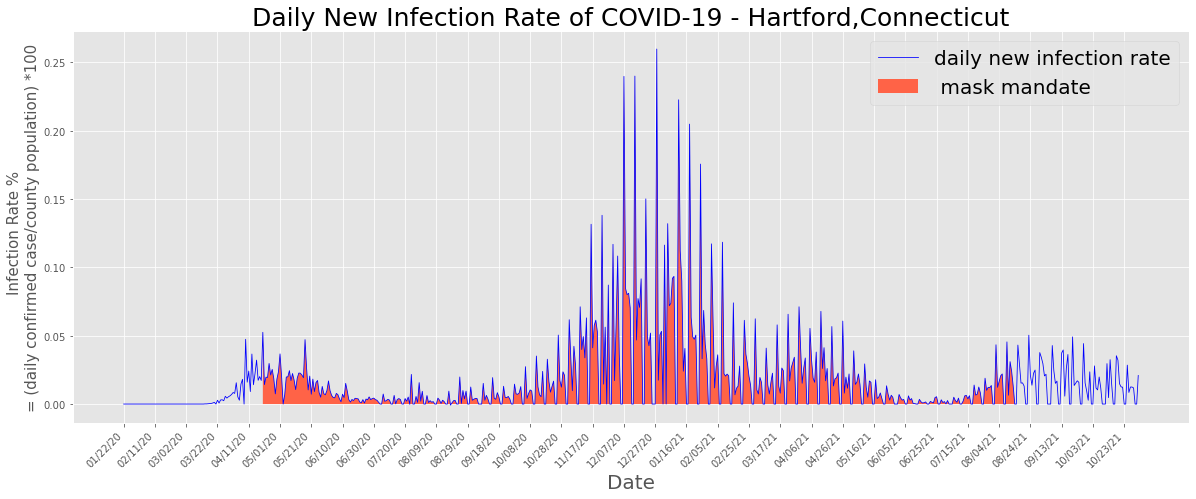

In [150]:
# Visulization

plt.style.use('ggplot')
fig=plt.figure(figsize = (20,8))



plt.plot(Hartford_mask_cases.date,
        Hartford_mask_cases.Daily_Case_Rate,
        linestyle = '-',
        linewidth =0.8,
        color = 'blue',
        label='daily new infection rate') 

plt.fill_between(Hartford_mask_cases.date,
                 Hartford_mask_cases.Daily_Case_Rate,
                 where = Hartford_mask_cases.Face_Masks_Required_in_Public ==1,
                 facecolor='tomato',
                 label=' mask mandate')



plt.title('Daily New Infection Rate of COVID-19 - Hartford,Connecticut', fontsize=25)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Infection Rate %  \n= (daily confirmed case/county population) *100',fontsize=15)
plt.xticks(range(0,650,20))
fig.autofmt_xdate(rotation = 45)
plt.legend(fontsize=20)

plt.savefig('Result Image.png')

plt.show()